# CNNs and Autoencoders

In this assignment we will first train a CNN for the classification problem and then an autoencoderencoder that learns representations of images of the `fashion_mnist` dataset. Finally, you will create a simple image retrieval system by using the trained autoencoder and the nearest-neighbors algorithm.

### Dataset `Fashion MNIST`

This examples uses [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images split into 10 categories. Each image contains one peace of clothing or footwear. 
Resolution of each image is $28 \times 28$ pixels.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Image 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST examples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a replacement for the traditional [MNIST](http://yann.lecun.com/exdb/mnist/) dataset that was previously often used as the first illustrative data set for classification (with images). `MNIST` contains images of handwritten numbers in a very similar format as previously described for `Fashion MNIST`.

Fashion `MNIST` is a somewhat heavier set of data compared to `MNIST`, but both sets are extremely clean (no noise, deviations in the corners of the photo, relatively similar lighting), and solving the classification problem on them is not difficult.

In this example, we will use $40000$ images to train the network, $20000$ images for the validation and the other $10000$ images to evaluate how accurately our network has classified the images.

Since `Fashion MNIST` is a relatively well-known set that is often used, it is not uncommon for libraries to provide auxiliary functions for its download and use.

In [46]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import metrics

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Input, Reshape
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, UpSampling2D, Conv2DTranspose, Cropping2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

**Question 1:** Using the `load_data` function from the `fashion_mnist` package, load images for the training set and the test set.

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print("Train images", train_images.shape)
print("Test images",test_images.shape)

Train images (60000, 28, 28)
Test images (10000, 28, 28)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


**Question 2:** Select the first $40000$ images from the loaded set for training, and then the next $20000$ for validation.

In [5]:
validation_images = train_images[40000:]
validation_labels = train_labels[40000:]

In [6]:
train_images = train_images[:40000]
train_labels = train_labels[:40000]

In [7]:
validation_images.shape

(20000, 28, 28)

In [8]:
train_images.shape

(40000, 28, 28)

In [9]:
test_images[0].shape

(28, 28)

**Question 3:** Transform the loaded images into the `float32` type, and then normalize them.

In [10]:
train_images, validation_images, test_images = train_images.astype('float32')/255.0, validation_images.astype('float32')/255.0, test_images.astype('float32')/255.0

In [11]:
test_images[0].shape

(28, 28)

## Part 1: CNN

**Question 4:** Create a convolutional neural network with the following properties:

- Sequential model consisting of convolutional and max pooling layers used alternately.
- Three convolutional layers consist of  $32$, $64$ and $128$  kernels, respectively and they are all of size $3\times 3$, with the  $\mathrm{ReLU}$  activation function.
- Each of the two max pooling layers is with the pool size  $2\times 2$.
- After the third convolutional layer use the `Flatten` layer.
- Finally, add on top two fully connected layers with $128$ and $10$  neurons, with $\mathrm{ReLU}$ and *softmax* activation functions, respectively.

In [12]:
def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model



**Question 5:** Train the previously defined network in $10$ epochs with the batch size equal to $32$. For the error, use `categorical cross entropy`, other parameters you may choose arbitrarily. Create a textual summary of your model.

In [13]:
model = build_model()
model.summary()

2022-12-24 12:02:11.131735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-24 12:02:11.132060: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-24 12:02:11.132251: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-24 12:02:11.132419: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-24 12:02:11.132578: W tensorf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [14]:
epochs = 10
batch_size = 32
num_classes = 10

In [15]:
train_labels_cat = keras.utils.to_categorical(train_labels, num_classes)
validation_labels_cat = keras.utils.to_categorical(validation_labels, num_classes)

In [16]:
model.compile(optimizer='adam', loss = tf.losses.categorical_crossentropy, metrics = ['accuracy'])

In [17]:
history = model.fit(train_images, train_labels_cat, epochs= epochs, batch_size= batch_size, 
                    validation_data=(validation_images, validation_labels_cat))

Epoch 1/10
1250/1250 [==============================] - 29s 22ms/step - loss: 0.5179 - accuracy: 0.8078 - val_loss: 0.3715 - val_accuracy: 0.8641
Epoch 2/10
1250/1250 [==============================] - 29s 23ms/step - loss: 0.3296 - accuracy: 0.8801 - val_loss: 0.3058 - val_accuracy: 0.8897
Epoch 3/10
1250/1250 [==============================] - 22s 18ms/step - loss: 0.2799 - accuracy: 0.8964 - val_loss: 0.3029 - val_accuracy: 0.8877
Epoch 4/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.2463 - accuracy: 0.9081 - val_loss: 0.2768 - val_accuracy: 0.8995
Epoch 5/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.2200 - accuracy: 0.9185 - val_loss: 0.2672 - val_accuracy: 0.9027
Epoch 6/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.1930 - accuracy: 0.9276 - val_loss: 0.2740 - val_accuracy: 0.9043
Epoch 7/10
1250/1250 [==============================] - 27s 22ms/step - loss: 0.1720 - accuracy: 0.9350 - val_loss: 0.2664 -

**Question 6:** 
- Plot the accuracy on the training and validation datasets over training epochs. Add a legend.
- What do you observe from the obtained plot?
- How could you improve the previous model? Explain shortly!

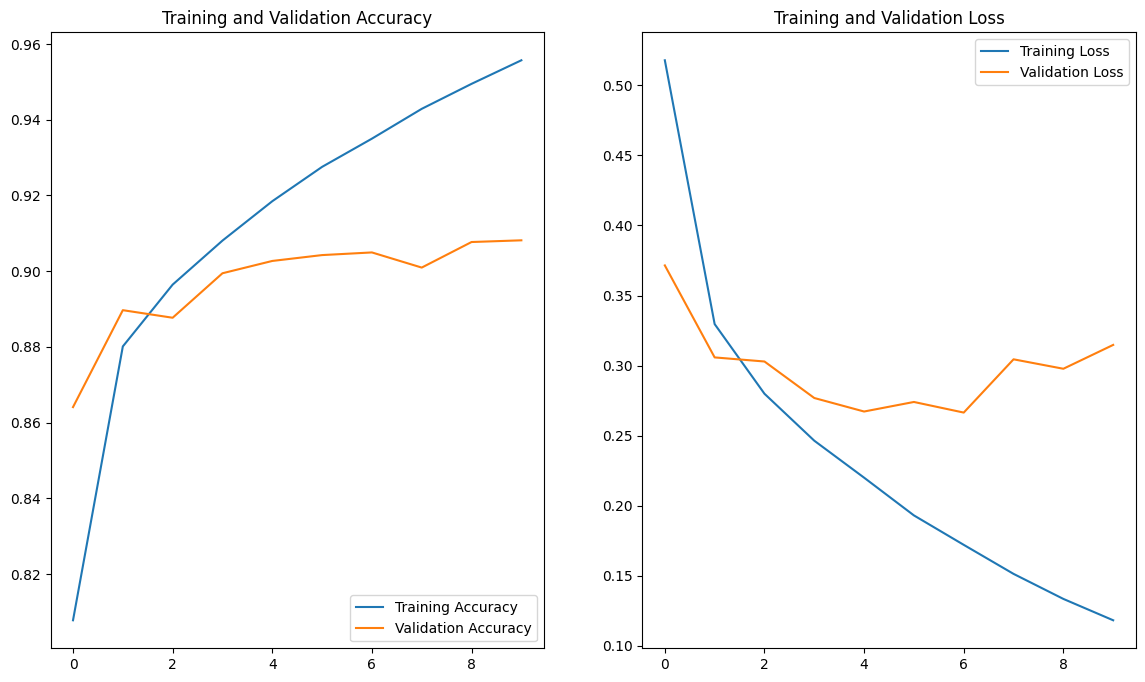

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

*We can see that the model is overfitting, as the validation loss is increasing and the accuracy with the training data is much higher than with the calidation (as the model is working too well on the training, so it is capturing specific features of the test data that don't appear on validation)*

*To prevent overfitting, we can use either dropouts or data augmentation*

## Part 2: Autoencoder

**Question 7:** Create an autoencoder network with the following properties:
- the `encoder` consists of $3$ convolutional and $3$ max pooling layers used alternately
    - convolutional layers consist of $64$, $32$ and $16$ kernels, respectively, of size $3\times 3$, and with the $\mathrm{ReLU}$ activation function 
    - each max pooling layer is with the pool size $2\times 2$
- the `decoder` consists of $3$ convolutional and $3$ up sampling layers used alternately
    - convolutional layers consist of $16$, $32$ and $64$ kernels, respectively, of size $3\times 3$, and with the $\mathrm{ReLU}$ activation function at each layer, except at the last (output) layer where the *sigmoid* activation function is used
    - each up sampling layer is with the usampling factors of size $2\times 2$.

Use the `Adam` optimizer and `MSE` error as a loss function. 

**Note:** Name the output of the final max pooling layer, i.e., the model that produces the latent representation, `encoder` (this will be useful for the second part of the assignment).

In [32]:
#Paramenters
kernel_size = 3
layer_filters = [64 , 32 , 16]
latent_dim = 16


In [33]:
#Encoder
inputs_layer = Input(shape=(28,28,1), name='input_encoder')
x = inputs_layer

for filters in layer_filters:
    x = Conv2D(filters,kernel_size, activation='relu', padding='same')(x)
    x = MaxPool2D((2,2), padding='same')(x)

shape = K.int_shape(x)

x = Flatten()(x)

latent_output = Dense(latent_dim, name='latent_output')(x)

encoder = Model(inputs_layer, latent_output, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_encoder (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 7, 7, 16)          4624

In [47]:
#Decoder
encoder_output = Input(shape=(latent_dim,), name='input_decoder')

x = Dense((shape[1]*shape[2]*shape[3]))(encoder_output)
x = Reshape((shape[1],shape[2],shape[3]))(x)

for filters in layer_filters[::-1]:
    if filters == layer_filters[-1]:
        x = Conv2DTranspose(filters, kernel_size, activation='sigmoid', padding='same')(x)
        x = UpSampling2D((2,2))(x)
    else:
        x = Conv2DTranspose(filters, kernel_size, activation='relu', padding='same')(x)
        x = UpSampling2D((2,2))(x)


output_layer = Conv2DTranspose(1, kernel_size,padding='same')(x)

output_layer = Cropping2D(cropping=((2,2),(2,2)))(output_layer)

decoder = Model(encoder_output, output_layer, name='decoder')
decoder.summary()
    

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_decoder (InputLayer)  [(None, 9)]               0         
                                                                 
 dense_19 (Dense)            (None, 256)               2560      
                                                                 
 reshape_17 (Reshape)        (None, 4, 4, 16)          0         
                                                                 
 conv2d_transpose_45 (Conv2D  (None, 4, 4, 16)         2320      
 Transpose)                                                      
                                                                 
 up_sampling2d_51 (UpSamplin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_transpose_46 (Conv2D  (None, 8, 8, 32)         4640

In [52]:
autoencoder = Model(inputs_layer, decoder(encoder(inputs_layer)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_encoder (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 9)                 26041     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         28593     
                                                                 
Total params: 54,634
Trainable params: 54,634
Non-trainable params: 0
_________________________________________________________________


In [63]:
autoencoder.compile(optimizer='adam', loss = 'MSE')

**Question 8:** Train the autoencoder over $10$ epochs. Set the `shuffle` parameter to True. Set the `batch_size` to $128$.

In [54]:
epochs = 10
batch_size = 128

In [56]:
print("train_images", train_images.shape)
print("validation_images", validation_images.shape)

train_images (40000, 28, 28)
validation_images (20000, 28, 28)


In [64]:
history = autoencoder.fit(train_images, train_images, epochs= epochs, batch_size= batch_size, 
                    shuffle=True, validation_data=(validation_images, validation_images))

Epoch 1/10
313/313 [==============================] - 72s 221ms/step - loss: 0.0440 - val_loss: 0.0254
Epoch 2/10
313/313 [==============================] - 68s 217ms/step - loss: 0.0229 - val_loss: 0.0213
Epoch 3/10
313/313 [==============================] - 68s 216ms/step - loss: 0.0205 - val_loss: 0.0198
Epoch 4/10
313/313 [==============================] - 69s 220ms/step - loss: 0.0193 - val_loss: 0.0192
Epoch 5/10
313/313 [==============================] - 65s 209ms/step - loss: 0.0185 - val_loss: 0.0185
Epoch 6/10
313/313 [==============================] - 62s 199ms/step - loss: 0.0180 - val_loss: 0.0177
Epoch 7/10
313/313 [==============================] - 62s 199ms/step - loss: 0.0175 - val_loss: 0.0172
Epoch 8/10
313/313 [==============================] - 62s 199ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 9/10
313/313 [==============================] - 70s 224ms/step - loss: 0.0170 - val_loss: 0.0167
Epoch 10/10
313/313 [==============================] - 79s 252ms/step - l

**Question 9:** Plot loss on the training and validation datasets over the training epochs. Add a legend to your plot.

In [66]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


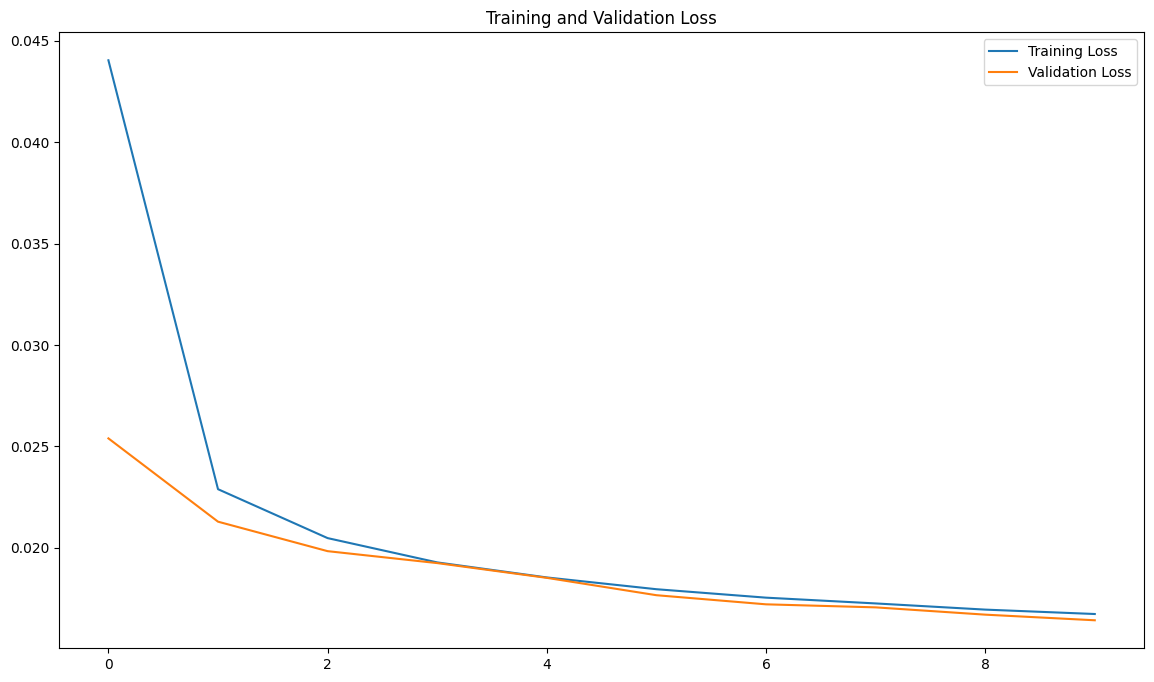

In [70]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Question 10:** Show for an arbitrary image of the test set how the autoencoder works. In other words, plot an arbitrary original and  predicted image from the test set.

In [71]:
autoencoder.save('models/autoencoder.h5')

In [72]:
autoencoder = keras.models.load_model('models/autoencoder.h5')

In [73]:
test_images_decoded = autoencoder.predict(test_images)

313/313 [==============================] - 7s 20ms/step


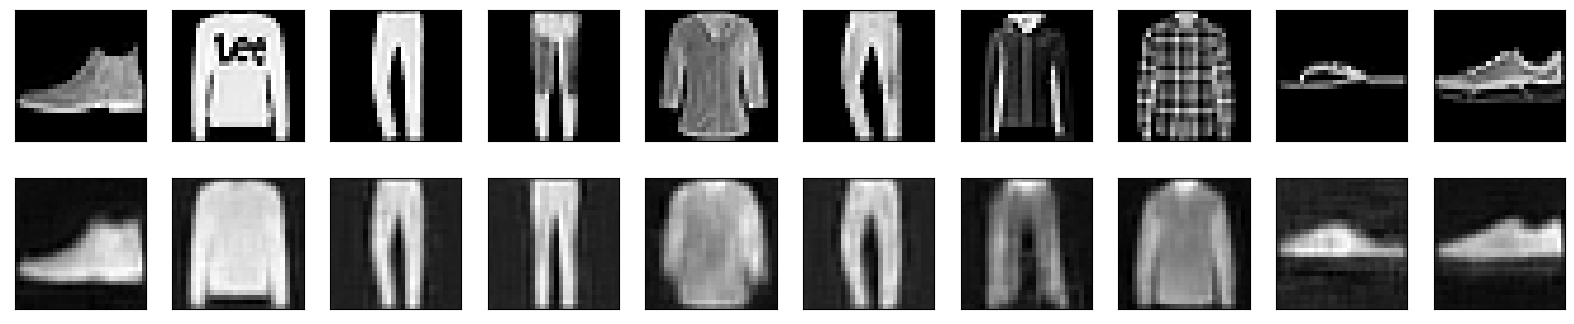

In [77]:
#Plotting images and decoded images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(test_images_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


**Question 11:** Calculate the loss for the autoencoder on the test set.

In [78]:
#Calculate loss of autoencoder in test set
test_loss = autoencoder.evaluate(test_images, test_images, verbose=0)
print('Test loss:', test_loss)

Test loss: 0.0165127981454134


Now, we will use the learned autoencoder for **similar image retrieval** task. More precisely, we can compute the distance between the latent-space vectors to look for similar images. Naturally, the smaller the distance, the more visually similar two images are. 

Your goal is to create a very simple image retrieval system by using the trained autoencoder and the [nearest-neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) algorithm.

**Question 12:** 
    
- Extract the encoder part of your autoencoder model and save it in the folder as `encoder.h5`.
- Fit the encoder part on your test set and reshape the output in order to obtain the latent space vectors.
- Choose an arbitrary query image from the test set.

In [79]:
encoder = autoencoder.get_layer('encoder')
encoder.save('models/encoder.h5')

In [80]:
test_images_encoded = encoder.predict(test_images).reshape(test_images.shape[0], latent_dim)

313/313 [==============================] - 2s 6ms/step


In [81]:
test_images_encoded.shape

(10000, 9)

In [91]:
query_image = test_images_encoded[0]

#Dont know if we should get a image we want or a random image
#query_image = test_images_encoded[np.random.randint(0, test_images_encoded.shape)]


**Question 13:** 
- Fit the NN algorithm to the encoded test set in order to obtain distances and indices of the data.
- Find the $10$ closest images to the encoded query image.
- Plot the obtained $10$ closest images.

In [88]:
from sklearn.neighbors import NearestNeighbors

In [89]:
#Fir NN to encoded test set to obtain distances and indices
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(test_images_encoded)

In [93]:
distances, indices = nn.kneighbors([query_image])

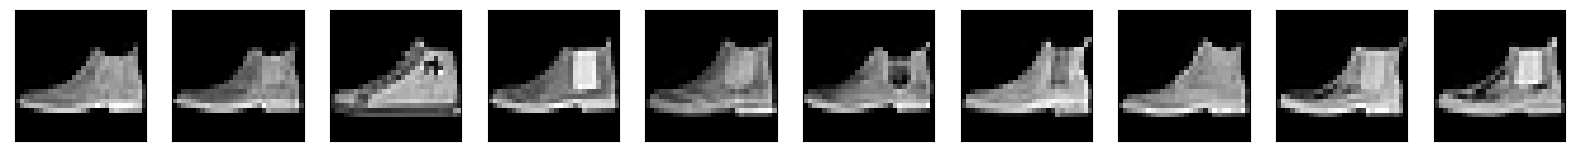

In [97]:
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(test_images[indices[0][i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
